# Problem Set 3


# Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
<ol>
   <li>  Import the necessary libraries </li>
   <li>  Import the dataset from this address.</li>
   <li>  Assign it to a variable called users.</li>
   <li>  Discover what is the mean age per occupation</li>
   <li>  Discover the Male ratio per occupation and sort it from the most to the least</li>
   <li>  For each occupation, calculate the minimum and maximum ages </li>
   <li>  For each combination of occupation and sex, calculate the mean age </li>
   <li>  For each occupation present the percentage of women and men </li>
</ol>    

In [1]:
#step 1,2 and 3

import pandas as pd
import numpy as np

dataset_address = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

users = pd.read_csv(dataset_address, sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [2]:
#step 4
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [3]:
#Step 5

male_ratio_per_occupation = users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)
print(male_ratio_per_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [4]:
#Step 6

min_max_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_ages_per_occupation)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [5]:
# Step 7

mean_age_per_occupation_and_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_and_gender)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [6]:
# step 8

total_per_occupation = users.groupby('occupation').size()
percentage_per_occupation = users.groupby(['occupation', 'gender']).size() / total_per_occupation * 100
print(percentage_per_occupation)

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2
Euro Teams
<ol>
    <li>Import the necessary libraries</li>
    <li>Import the dataset from this address</li>
    <li> Assign it to a variable called euro12</li>
    <li>Select only the Goal column</li>
    <li>How many team participated in the Euro2012?</li>
    <li>What is the number of columns in the dataset?</li>
    <li>View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline</li>
    <li>Sort the teams by Red Cards, then to Yellow Cards</li>
    <li>Calculate the mean Yellow Cards given per Team</li>
    <li>Filter teams that scored more than 6 goalsStep </li>
    <li>Select the teams that start with G</li>
    <li>Select the first 7 columns</li>
    <li>Select all columns except the last 3</li>
    <li>Present only the Shooting Accuracy from England, Italy and Russia</li>
</ol>    

In [7]:
# Step 1, Step 2 and Step 3

import pandas as pd

data_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

euro12 = pd.read_csv(data_url)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [8]:
# Step 4

goals_column = euro12['Goals']
print(goals_column)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [9]:
# Step 5

num_teams = euro12['Team'].nunique()
print(num_teams)

16


In [10]:
# Step 6

num_columns = euro12.shape[1]
print(num_columns)


35


In [11]:
# Step 7

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [12]:
# Step 8

sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print(sorted_discipline)

                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


In [13]:
# Step 9

mean_yellow_cards_per_team = euro12.groupby('Team')['Yellow Cards'].mean()
print(mean_yellow_cards_per_team)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [14]:
# Step 10

teams_with_more_than_6_goals = euro12[euro12['Goals'] > 6]
print(teams_with_more_than_6_goals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [15]:
# Step 11

teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print(teams_starting_with_G)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [16]:
# Step 12

first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [17]:
# Step 13

columns_except_last_3 = euro12.iloc[:, :-3]
print(columns_except_last_3)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [18]:
# Step 14

shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), 'Shooting Accuracy']
print(shooting_accuracy)

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object


# Question 3
Housing
<ol>
    <li>Import the necessary libraries</li>
    <li>Create 3 differents Series, each of length 100, as follows:
        <ul>
            <li>The first a random number from 1 to 4</li>
            <li>The second a random number from 1 to 3</li>
            <li>The third a random number from 10,000 to 30,000</li>
        </ul>    
    </li>
    <li>Create a DataFrame by joinning the Series by column</li>
    <li>Change the name of the columns to bedrs, bathrs, price_sqr_meter</li>
    <li> Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'</li>
    <li> Ops it seems it is going only until index 99. Is it true?</li>
    <li>Reindex the DataFrame so it goes from 0 to 299 </li>
</ol>    

In [20]:
# Step 1

import pandas as pd
import numpy as np

# Step 2

np.random.seed(42)

series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

print(series1, series2, series3)

0     3
1     4
2     1
3     3
4     3
     ..
95    2
96    2
97    4
98    2
99    1
Length: 100, dtype: int32 0     3
1     2
2     2
3     2
4     2
     ..
95    1
96    2
97    1
98    1
99    2
Length: 100, dtype: int32 0     23931
1     13627
2     26157
3     20173
4     28047
      ...  
95    11154
96    14499
97    16295
98    22183
99    22874
Length: 100, dtype: int32


In [21]:
# Step 3

df = pd.concat([series1, series2, series3], axis=1)
df.head()

,0,1,2
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047


In [22]:
# Step 4

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df.head()

,bedrs,bathrs,price_sqr_meter
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047


In [27]:
# Step 5
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)

In [28]:
# Step 6
print(bigcolumn.index.max())

299


In [31]:
# Step 7

bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          3
1          4
2          1
3          3
4          3
       ...  
295    11154
296    14499
297    16295
298    22183
299    22874
Length: 300, dtype: int32

# Question 4
Wind Statistics
<br>
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.

You should be able to perform all of these operations without using a for loop or
other looping construct.
<br>
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
<br>
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 <br>
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83 <br>
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71 
<br>
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
<ol>
    <li>Import the necessary libraries</li>
    <li>Import the dataset from the attached file wind.txt</li>
    <li>Assign it to a variable called data and replace the first 3 columns by a proper datetime index.</li>
    <li>Year 2061? Do we really have data from this year? Create a function to fix it and apply it.</li>
    <li>Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].</li>
    <li>Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.</li>
    <li>Compute how many non-missing values there are in total.</li>
    <li>Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
    <br> A single number for the entire dataset</li>
    <li>Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days <br> A different set of numbers for each location.</li>
    <li>Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.<br> A different set of numbers for each day</li>
    <li>Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.</li>
    <li>Downsample the record to a yearly frequency for each location</li>
    <li>Downsample the record to a monthly frequency for each location</li>
    <li>Downsample the record to a weekly frequency for each location.</li>
    <li>Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks</li>
</ol>


In [42]:
#Step 1 and Step 2

import pandas as pd


data = pd.read_csv("wind.txt", sep="\s+")
data.head()


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [1]:
# Step 3

data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'}))
data = data.set_index('date')
data = data.drop(columns=['Yr', 'Mo', 'Dy'])
print(data)


NameError: name 'pd' is not defined

In [46]:
# step 4
def fix_year(year):
    if year >= 99:
        return year + 2000
    else:
        return year + 1900
data['Yr'] = data['Yr'].apply(fix_year)
print(data['Yr'])


0       1961
1       1961
2       1961
3       1961
4       1961
        ... 
6569    1978
6570    1978
6571    1978
6572    1978
6573    1978
Name: Yr, Length: 6574, dtype: int64


In [49]:
# step 5

data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'}))
data = data.set_index('date')
data = data.drop(columns=['Yr', 'Mo', 'Dy'])
print(data)


              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
date                                                                        
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46   
1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58   

In [50]:
# step 6
missing_values = data.isnull().sum()
print(missing_values)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [51]:
# step 7

non_missing_values = data.notnull().sum().sum()
print(non_missing_values)

78857


In [53]:
# step 8

mean_windspeed = data.mean().mean()
print(mean_windspeed)

10.227982360836938


In [54]:
# step 9

loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
loc_stats.head()

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125


In [55]:
# step 10

day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
day_stats.head()

,min,max,mean,std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [58]:
# step 11

january_average = data[data.index.month == 1].mean()
print(january_average)


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [59]:
# step 12

data_yearly = data.resample('Y').mean()
print(data_yearly)

                  RPT        VAL        ROS       KIL        SHA       BIR  \
date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [60]:
# step 13

data_monthly = data.resample('M').mean()
print(data_monthly)

                  RPT        VAL        ROS       KIL        SHA        BIR  \
date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

In [61]:
# step 14
data_weekly = data.resample('W').mean()
print(data_weekly)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

In [65]:
# step 15
weekly_stats = data_weekly.iloc[1:53].agg(['min', 'max', 'mean', 'std'])
print(data_weekly)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

# Question 5
<ol>
    <li>Import the necessary libraries</li>
    <li>Import the dataset from this address.</li>
    <li>Assign it to a variable called chipo.</li>
    <li>See the first 10 entries</li>
    <li>What is the number of observations in the dataset?</li>
    <li>What is the number of columns in the dataset?</li>
    <li>Print the name of all the columns.</li>
    <li>How is the dataset indexed?</li>
    <li>Which was the most-ordered item?</li>
    <li>For the most-ordered item, how many items were ordered?</li>
    <li>What was the most ordered item in the choice_description column?</li>
    <li>How many items were orderd in total?</li>
    <li>
        <ul>
            <li>Turn the item price into a float</li>
            <li>Check the item price type</li>
            <li>Create a lambda function and change the type of item price</li>
            <li>Check the item price type</li>
        </ul>    
    </li>
    <li>How much was the revenue for the period in the dataset?</li>
    <li>How many orders were made in the period?</li>
    <li>What is the average revenue amount per order?</li>
    <li>How many different items are sold?</li>
</ol>    

In [66]:
# Step 1
import pandas as pd

# Step 2
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

#Step 3
chipo = pd.read_csv(url, delimiter='\t')

# Step 4
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [67]:
# Step 5
num_observations = len(chipo)
print("Number of observations:", num_observations)

Number of observations: 4622


In [68]:
# Step 6
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

Number of columns: 5


In [69]:
# Step 7
print("Columns:", chipo.columns.tolist())

Columns: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [70]:
# Step 8
print("Index:", chipo.index)

Index: RangeIndex(start=0, stop=4622, step=1)


In [71]:
# Step 9
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)

Most-ordered item: Chicken Bowl


In [72]:
# Step 10
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Quantity ordered for most-ordered item:", most_ordered_item_count)

Quantity ordered for most-ordered item: 761


In [73]:
# Step 11
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered item in choice_description:", most_ordered_choice_description)

Most-ordered item in choice_description: [Diet Coke]


In [74]:
# Step 12
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [75]:
# Step 13

# Remove the dollar sign and convert to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Check the item price type
print("Item price type after conversion:", type(chipo['item_price'].iloc[0]))

Item price type after conversion: <class 'numpy.float64'>


In [76]:
# Step 14
revenue = (chipo['item_price'] * chipo['quantity']).sum()
print("Total revenue:", revenue)


Total revenue: 39237.02


In [77]:
# Step 15
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

Number of orders: 1834


In [78]:
# Step 16
average_revenue_per_order = revenue / num_orders
print("Average revenue per order:", average_revenue_per_order)

Average revenue per order: 21.39423118865867


In [79]:
# Step 17
num_unique_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_unique_items)

Number of different items sold: 50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

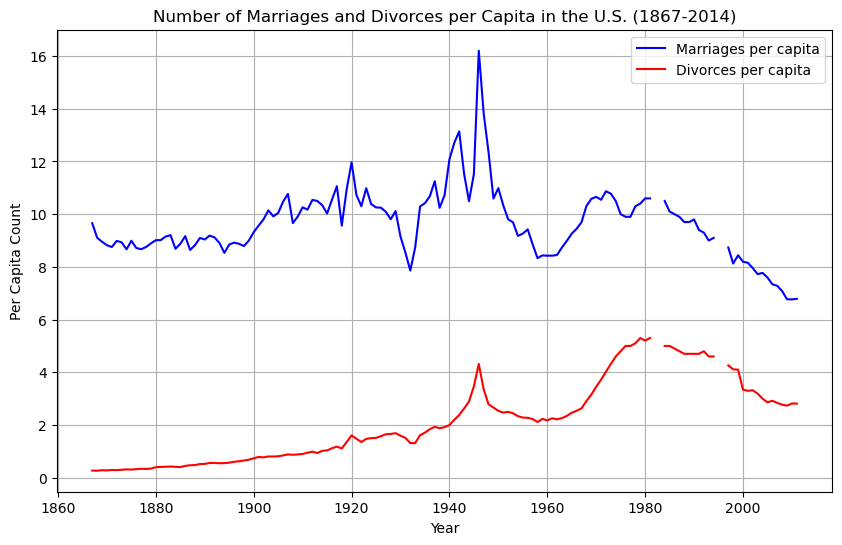

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv(r"C:\Users\91975\Downloads\us-marriages-divorces-1867-2014.csv")

# Calculate per capita values
data['Marriages_per_capita'] = data['Marriages'] / data['Population'] * 1000
data['Divorces_per_capita'] = data['Divorces'] / data['Population'] * 1000

# Extract the years and per capita values for plotting
years = data['Year']
marriages_per_capita = data['Marriages_per_capita']
divorces_per_capita = data['Divorces_per_capita']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(years, marriages_per_capita, label='Marriages per capita', color='blue')
plt.plot(years, divorces_per_capita, label='Divorces per capita', color='red')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()



# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

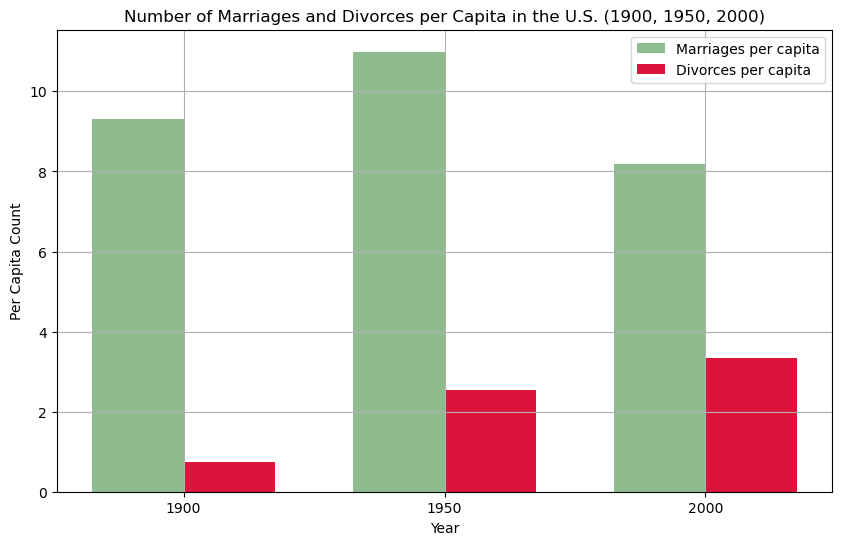

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

# Calculate per capita values
data['Marriages_per_capita'] = data['Marriages'] / data['Population'] * 1000
data['Divorces_per_capita'] = data['Divorces'] / data['Population'] * 1000

# Filter data for years 1900, 1950, and 2000
years_of_interest = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years_of_interest)]

# Extract the years and per capita values for plotting
years = filtered_data['Year']
marriages_per_capita = filtered_data['Marriages_per_capita']
divorces_per_capita = filtered_data['Divorces_per_capita']

# Create the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(years))

plt.bar(index, marriages_per_capita, bar_width, label='Marriages per capita', color='DarkSeaGreen')
plt.bar([i + bar_width for i in index], divorces_per_capita, bar_width, label='Divorces per capita', color='Crimson')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks([i + bar_width / 2 for i in index], years)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


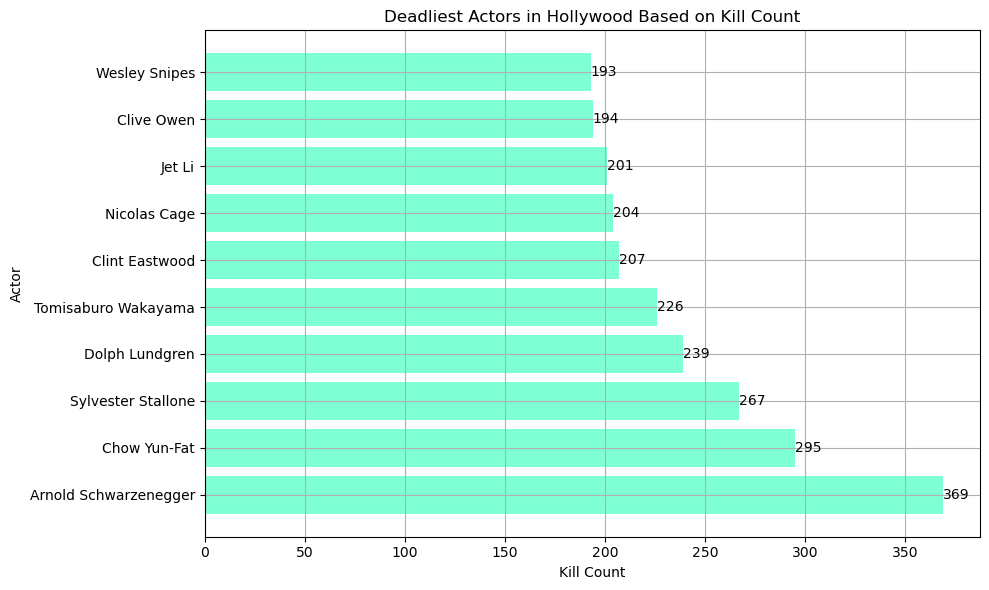

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("actor_kill_counts.csv")

# Sort the data by kill count in descending order
data.sort_values(by='Count', ascending=False, inplace=True)

# Extract the actor names and kill counts for plotting
actors = data['Actor']
kill_counts = data['Count']

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(actors, kill_counts, color='Aquamarine')

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood Based on Kill Count')

# Add labels to each bar
for index, value in enumerate(kill_counts):
    plt.text(value, index, str(value), color='black', ha='left', va='center')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
<br>
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

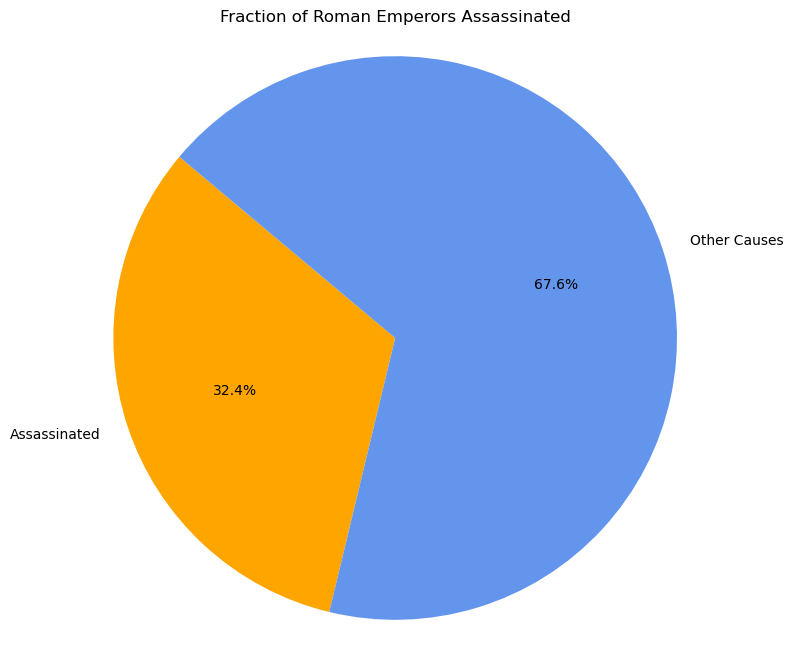

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("roman-emperor-reigns.csv")

# Count the number of emperors who were assassinated
assassinated_count = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]

# Count the total number of emperors
total_emperors = data.shape[0]

# Calculate the percentage of emperors who were assassinated
percentage_assassinated = (assassinated_count / total_emperors) * 100

# Calculate the percentage of emperors who died from other causes
percentage_other_causes = 100 - percentage_assassinated

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = ['Assassinated', 'Other Causes']
sizes = [percentage_assassinated, percentage_other_causes]
colors = ['orange', 'CornflowerBlue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Fraction of Roman Emperors Assassinated')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
<br>
Don't forget to label your axes!
<br>
Color each dot according to its year

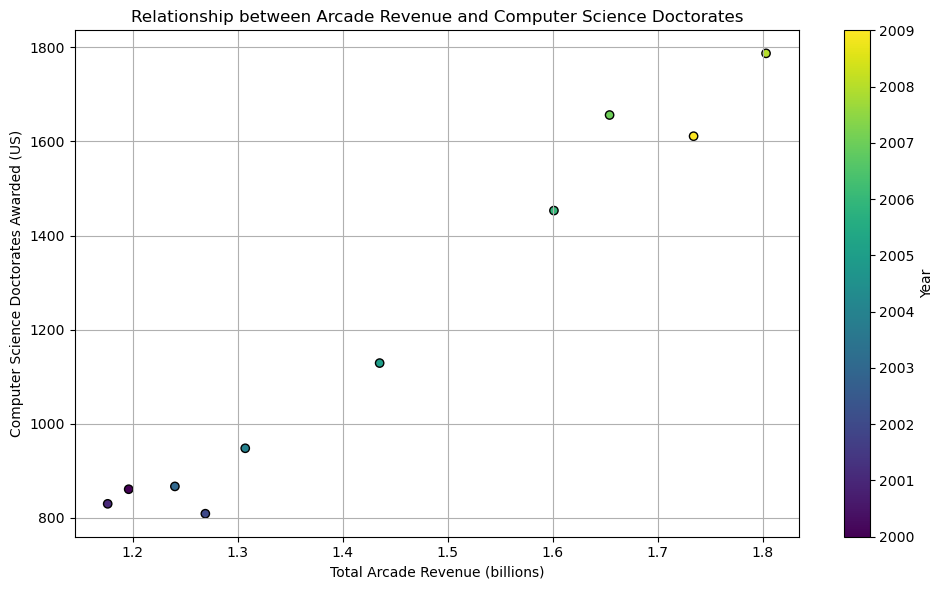

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Extract the data for plotting
years = data['Year']
revenue = data['Total Arcade Revenue (billions)']
doctorates = data['Computer Science Doctorates Awarded (US)']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(revenue, doctorates, c=years, cmap='viridis', edgecolors='k')

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates')

# Add colorbar to show the year mapping
cbar = plt.colorbar()
cbar.set_label('Year')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
